# BeautifulSoup4

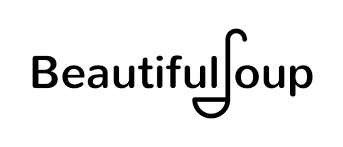

**BeautifulSoup4** — это библиотека Python, предназначенная для парсинга HTML и XML документов. Она помогает разработчикам удобно работать с HTML-разметкой, извлекая нужные данные из веб-страниц и структурируя их в виде объектов. Благодаря Beautiful Soup4 можно легко получать доступ к тегам, атрибутам, текстовому содержимому и другим элементам веб-страницы, что делает её удобной для веб-скрейпинга.

Beautiful Soup4 автоматически обрабатывает ошибки в HTML-разметке, что особенно полезно для парсинга страниц, которые не всегда соответствуют стандартам. Она работает в связке с другими библиотеками для HTTP-запросов, например, с requests, и с различными парсерами, такими как `html.parser`, `lxml` и `html5lib`.

## Парсинг HTML и XML: зачем нужен Beautiful Soup4

**HTML и XML** — это структуры данных, представленные в виде дерева, где элементы документа (теги) расположены в виде иерархии. BeautifulSoup4 превращает HTML или XML-документ в удобное дерево объектов, которое упрощает доступ к любому элементу структуры. Основная задача BeautifulSoup4 — обеспечить простой интерфейс для взаимодействия с элементами HTML-документа, предоставляя методы для поиска, навигации и манипуляции данными.

Пример документа в формате HTML:

In [24]:
!pip install html5lib

   ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
   -------------------------------- ------- 92.2/112.2 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 112.2/112.2 kB 2.2 MB/s eta 0:00:00


In [22]:
<!DOCTYPE html>
<html lang="en">
<head>
    <title>Example Page</title>
</head>
<body>
    <h1>Hello, World!</h1>
    <p>This is a sample paragraph.</p>
</body>
</html>

## Принцип работы Beautiful Soup4: разбор HTML-документа в дерево объектов (DOM)

Когда HTML-документ загружен в Beautiful Soup, он преобразуется в дерево объектов. Это дерево, называемое DOM (Document Object Model), позволяет легко перемещаться между элементами (тегами) и извлекать нужные данные. В Beautiful Soup каждый HTML-тег представлен объектом, а атрибуты тега и его содержимое можно получить как свойства этого объекта.

Для начала работы необходимо импортировать Beautiful Soup и загрузить HTML:

In [9]:
from bs4 import BeautifulSoup

html_doc = """
<!DOCTYPE html>
<html lang="en">
<head>
    <title>Example Page</title>
</head>
<body>
    <h1>Hello, World!</h1>
    <p>This is a sample paragraph.</p>
</body>
</html>
"""

soup = BeautifulSoup(html_doc, 'html.parser')  # Парсим HTML с использованием встроенного парсера

После парсинга можно обращаться к элементам документа как к объектам:

In [11]:
# Получение заголовка страницы
title = soup.title
print(title)           
print(title.text)      

<title>Example Page</title>
Example Page


## Способы парсинга HTML: lxml, html.parser, html5lib — обзор, различия и примеры использования
Beautiful Soup4 поддерживает несколько различных парсеров для обработки HTML:

1. `html.parser` — встроенный парсер Python. Он прост и удобен, но может не справляться с очень сложной или поврежденной разметкой.
2. `lxml` — более быстрый парсер с хорошей поддержкой некорректного HTML и XML. Требует установку lxml через pip.
3. `html5lib` — парсер, который более точно интерпретирует HTML5-документы. Используется в тех случаях, когда нужна поддержка полного стандарта HTML5. Требует установку html5lib.

In [2]:
from bs4 import BeautifulSoup

# Пример HTML-документа
html_doc = "<html><head><title>Example</title></head><body><h1>Content</h1></body></html>"

# html.parser (встроенный)
soup_builtin = BeautifulSoup(html_doc, 'html.parser')
print(soup_builtin.title)  

# lxml
soup_lxml = BeautifulSoup(html_doc, 'lxml')
print(soup_lxml.title)  

# html5lib
soup_html5lib = BeautifulSoup(html_doc, 'html5lib')
print(soup_html5lib.title)  

<title>Example</title>
<title>Example</title>
<title>Example</title>


Каждый из этих парсеров может быть полезен в зависимости от сложности и специфики HTML-кода. Например, lxml — выбор для скоростного парсинга, а html5lib лучше подходит для нестандартного HTML5.

## Работа с HTML-структурой
В этом разделе мы разберем основные методы Beautiful Soup4 для работы с HTML-структурой, включая поиск и навигацию по элементам документа, выбор элементов по атрибутам и классам, а также получение текста и атрибутов.

## Обзор элементов HTML-документа
HTML-документ представляет собой дерево, где каждый элемент (тег) может содержать текст или другие теги (вложенные элементы). Основные элементы, с которыми будем работать:

- **Теги** (`<h1>`, `<p>`, `<div>` и т. д.) — это основные строительные блоки HTML.
- **Атрибуты тегов** (например, `href`, `src`, `class`) содержат метаинформацию о теге.
- **Текстовое содержимое** — это текст внутри тегов.
- **Ссылки и изображения** — часто извлекаются для получения контента, связанного с изображениями или гиперссылками.

Пример HTML-документа для работы:

In [ ]:
<html>
<head><title>Sample Page</title></head>
<body>
    <h1 class="title">Hello, Beautiful Soup!</h1>
    <p class="description">This is a sample paragraph with <a href="https://example.com">a link</a>.</p>
    <p class="description">Another paragraph with <a href="https://another.com">another link</a>.</p>
    <div class="content">
        <p>More text inside a div.</p>
    </div>
</body>
</html>

## Методы Beautiful Soup для поиска элементов
Beautiful Soup4 предлагает несколько методов для поиска и извлечения элементов HTML-структуры. Рассмотрим основные из них.

1. **Метод find**

Метод `find` возвращает первый элемент, который соответствует условиям поиска. Это полезно, если нужно найти один конкретный элемент.

In [31]:
from bs4 import BeautifulSoup

html_doc = """
<html>
<head><title>Sample Page</title></head>
<body>
    <h1 class="title">Hello, Beautiful Soup!</h1>
    <p class="description">This is a sample paragraph with <a href="https://example.com">a link</a>.</p>
    <p class="absolute">Hello my friend <a href="https://example.com">I'm Peter</a>.</p>
</body>
</html>
"""

soup = BeautifulSoup(html_doc, 'html.parser')

# Находим первый элемент <h1>
h1_tag = soup.find('h1')
print(h1_tag.text)

Hello, Beautiful Soup!


2. **Метод find_all**

Метод `find_all` возвращает все элементы, которые соответствуют условиям поиска, в виде списка. Это полезно, когда нужно найти несколько элементов одного типа.Beautiful Soup!


In [33]:
# Находим все элементы <p>
paragraphs = soup.find_all('p')
for p in paragraphs:
    print(p.text)

This is a sample paragraph with a link.
Hello my friend I'm Peter.


3. **Метод select**
   
Метод `select` позволяет использовать CSS-селекторы для нахождения элементов. Это гибкий метод, так как CSS-селекторы дают возможность точно указать, какой элемент нужен.

In [35]:
# Используем CSS-селекторы для выбора элементов с классом .description
descriptions = soup.select('.description')
for desc in descriptions:
    print(desc.text)

This is a sample paragraph with a link.


## Поиск элементов по атрибутам и классам
Beautiful Soup позволяет выполнять поиск элементов по определённым атрибутам, таким как `class`, `id`, `href`, и т. д. В примере ниже ищем элементы `<p>` с классом `description`.

In [38]:
# Находим все <p> элементы с классом 'description'
desc_paragraphs = soup.find_all('p', class_='description')
for p in desc_paragraphs:
    print(p.text)

This is a sample paragraph with a link.


Поиск по атрибутам может включать и другие атрибуты, например, `href` у `<a>` для ссылок. link.


In [41]:
# Извлекаем все ссылки с атрибутом href
links = soup.find_all('a', href=True)
for link in links:
    print(link['href'])

https://example.com
https://example.com


## Навигация по дереву элементов

Beautiful Soup поддерживает методы для перемещения между элементами, такие как find_parent, find_next_sibling, find_previous_sibling, и find_all_siblings.

Метод `find_parent` позволяет найти родительский элемент для текущего тега.

In [44]:
# Находим родительский элемент для первого <a>
link = soup.find('a')
parent = link.find_parent()
print(parent) 

<p class="description">This is a sample paragraph with <a href="https://example.com">a link</a>.</p>


Метод `find_next_sibling` и `find_previous_sibling`
Эти методы находят следующий или предыдущий элемент на том же уровне иерархии.

In [48]:
# Находим следующий элемент после первого <p>
first_paragraph = soup.find('p')
next_sibling = first_paragraph.find_next_sibling('p')
print(next_sibling.text)

Hello my friend I'm Peter.


## Поиск по тексту
Метод `find_all` также позволяет искать элементы по их текстовому содержимому, что бывает полезно для нахождения конкретных текстов на странице.k.


In [51]:
# Поиск элементов, содержащих слово 'sample'
sample_elements = soup.find_all(text="This is a sample paragraph with a link.")
for element in sample_elements:
    print(element)

C:\Users\NeKonn\AppData\Local\Temp\ipykernel_4440\767990212.py:2: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  sample_elements = soup.find_all(text="This is a sample paragraph with a link.")


## Пример комплексного поиска
Скомбинируем несколько методов, чтобы извлечь все ссылки и их текст внутри элементов с классом `description`.

In [54]:
# Находим все <p> с классом 'description' и извлекаем ссылки и текст
for p in soup.find_all('p', class_='description'):
    link = p.find('a')
    if link:
        print(f"Текст ссылки: {link.text}")
        print(f"URL: {link['href']}")

Текст ссылки: a link
URL: https://example.com


## Извлечение и обработка данных

## Доступ к содержимому тегов (.text, .string, .get_text())
При работе с Beautiful Soup есть несколько способов получить текст из тега. Разберем каждый из них на примере сайта Hacker News.

Чтобы начать веб-скрейпинг, сначала необходимо подключиться к веб-странице. Для этого можно использовать библиотеку requests, чтобы получить HTML-код страницы, и передать его Beautiful Soup для дальнейшего анализа.

In [18]:
import requests
from bs4 import BeautifulSoup

# Загружаем страницу
url = "https://news.ycombinator.com/"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

- `.text` — возвращает весь текст внутри тега, включая текст вложенных тегов.
- `.string` — возвращает текст только если внутри тега нет других вложенных тегов. Иначе вернет None.
- `.get_text()` — возвращает текст внутри тега, но позволяет удалить пробелы и указать разделители.

Применим каждый из этих методов для получения текста заголовков на сайте Hacker News:

После выполнения этого кода HTML-контент страницы будет загружен в объект soup, и можно будет применять к нему методы для извлечения информации.

In [16]:
# Проверка статуса и вывод HTML разметки
if response.status_code == 200:
    html_content = response.text
    print(html_content)  # Вывод HTML-разметки
else:
    print(f"Ошибка при загрузке страницы: {response.status_code}")

<html lang="en" op="news"><head><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1.0"><link rel="stylesheet" type="text/css" href="news.css?1Gl3t9hYloFExwufaaPt">
        <link rel="icon" href="y18.svg">
                  <link rel="alternate" type="application/rss+xml" title="RSS" href="rss">
        <title>Hacker News</title></head><body><center><table id="hnmain" border="0" cellpadding="0" cellspacing="0" width="85%" bgcolor="#f6f6ef">
        <tr><td bgcolor="#ff6600"><table border="0" cellpadding="0" cellspacing="0" width="100%" style="padding:2px"><tr><td style="width:18px;padding-right:4px"><a href="https://news.ycombinator.com"><img src="y18.svg" width="18" height="18" style="border:1px white solid; display:block"></a></td>
                  <td style="line-height:12pt; height:10px;"><span class="pagetop"><b class="hnname"><a href="news">Hacker News</a></b>
                            <a href="newest">new</a> | <a href="fro

In [24]:
# Находим все элементы <span> с классом 'titleline', содержащие заголовки статей
titles = soup.find_all('span', class_='titleline')
for title in titles:
    # Извлекаем тег <a> внутри каждого <span class="titleline">
    title_link = title.find('a')
    if title_link:
        # Используем три разных метода для получения текста
        print("Полный текст с .text:", title_link.text)  
        print("Текст с .string:", title_link.string)  
        print("Текст с .get_text(strip=True):", title_link.get_text(strip=True))
        print("URL статьи:", title_link['href'])
        print("-" * 40)

Полный текст с .text: Why I love Rust for tokenising and parsing
Текст с .string: Why I love Rust for tokenising and parsing
Текст с .get_text(strip=True): Why I love Rust for tokenising and parsing
URL статьи: https://xnacly.me/posts/2024/rust-pldev/
----------------------------------------
Полный текст с .text: There's Almost No Gitlab
Текст с .string: There's Almost No Gitlab
Текст с .get_text(strip=True): There's Almost No Gitlab
URL статьи: https://julien.danjou.info/p/theres-almost-no-gitlab
----------------------------------------
Полный текст с .text: Ham Radio 101: What is WSPR?
Текст с .string: Ham Radio 101: What is WSPR?
Текст с .get_text(strip=True): Ham Radio 101: What is WSPR?
URL статьи: https://www.onallbands.com/ham-radio-101-what-is-wspr/
----------------------------------------
Полный текст с .text: After decades, FDA moves to pull ineffective decongestant off shelves
Текст с .string: After decades, FDA moves to pull ineffective decongestant off shelves
Текст с .get

В этом случае вывод одинаковый, потому что:

Внутри тега `<a>` нет вложенных тегов или дополнительной разметки.

Текст в заголовке и так уже отформатирован без лишних пробелов, поэтому `.get_text(strip=True)` не удаляет ничего лишнего.
Вот почему все три метода — `.text`, `.string` и `.get_text(strip=True)` — возвращают одинаковый результат.

**Когда могут быть различия?**

Различия могут проявиться, если:

- Внутри тега `<a>` будут другие вложенные теги (например, `<b>`, `<span>` и т.д.). В этом случае `.string` вернет `None`, а `.text` и `.get_text()` все равно отобразят полный текст.
- Если текст внутри тега будет окружен пробелами, `.get_text(strip=True)` уберет их, тогда как `.text` и `.string` оставят пробелы.

## Извлечение значений атрибутов (например, ссылок href и изображений src)

Для получения атрибутов, таких как `href` для ссылок или `src` для изображений, можно использовать доступ по ключу, аналогично словарю Python.

In [34]:
import requests
from bs4 import BeautifulSoup

# Загружаем страницу
url = "https://arstechnica.com/health/2024/11/fda-proposes-ditching-common-decongestant-for-being-completely-useless/"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

In [36]:
# Проверка статуса и вывод HTML разметки
if response.status_code == 200:
    html_content = response.text
    print(html_content)  # Вывод HTML-разметки
else:
    print(f"Ошибка при загрузке страницы: {response.status_code}")

<!doctype html>
<html lang="en-US" class="view-grid">

<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>After decades, FDA finally moves to pull ineffective decongestant off shelves &#x2d; Ars Technica</title>
<link rel="preconnect" href="https://c.arstechnica.com">

<!-- The SEO Framework by Sybre Waaijer -->
<meta name="robots" content="max-snippet:-1,max-image-preview:large,max-video-preview:-1" />
<link rel="canonical" href="https://arstechnica.com/health/2024/11/fda-proposes-ditching-common-decongestant-for-being-completely-useless/" />
<meta name="description" content="Last year, FDA advisors unanimously voted that oral phenylephrine is ineffective." />
<meta property="og:type" content="article" />
<meta property="og:locale" content="en_US" />
<meta property="og:site_name" content="Ars Technica" />
<meta property="og:title" content="After decades, FDA finally moves to pull ineffective decongestant off shelves" />
<met

In [40]:
# Извлекаем значения из метатегов
title = soup.find("meta", property="og:title")['content'] if soup.find("meta", property="og:title") else "Заголовок не найден"
description = soup.find("meta", property="og:description")['content'] if soup.find("meta", property="og:description") else "Описание не найдено"
url_article = soup.find("meta", property="og:url")['content'] if soup.find("meta", property="og:url") else "URL не найден"
image_url = soup.find("meta", property="og:image")['content'] if soup.find("meta", property="og:image") else "URL изображения не найден"

# Находим все ссылки на странице
all_links = soup.find_all('a', href=True)
print("Все ссылки на странице:")
for link in all_links:
    print(link['href'])

# Находим все изображения на странице
all_images = soup.find_all('img', src=True)
print("\nВсе изображения на странице:")
for img in all_images:
    print(img['src'])

# Печатаем результаты для метатегов
print("\nИнформация из метатегов:")
print(f"Заголовок: {title}")
print(f"Описание: {description}")
print(f"URL статьи: {url_article}")
print(f"URL изображения: {image_url}")

Все ссылки на странице:
#main
https://arstechnica.com/
/civis/
/store/product/subscriptions/
/search/
https://arstechnica.com/ai/
https://arstechnica.com/information-technology/
https://arstechnica.com/cars/
https://arstechnica.com/culture/
https://arstechnica.com/gaming/
https://arstechnica.com/health/
https://arstechnica.com/tech-policy/
https://arstechnica.com/science/
https://arstechnica.com/security/
https://arstechnica.com/space/
https://arstechnica.com/gadgets/
/features/
/reviews/
/store/
https://arstechnica.com/ai/
https://arstechnica.com/information-technology/
https://arstechnica.com/cars/
https://arstechnica.com/culture/
https://arstechnica.com/gaming/
https://arstechnica.com/health/
https://arstechnica.com/tech-policy/
https://arstechnica.com/science/
https://arstechnica.com/security/
https://arstechnica.com/space/
https://arstechnica.com/gadgets/
/civis/
/store/product/subscriptions/
/store/product/subscriptions/
https://arstechnica.com/author/beth/
https://arstechnica.co

## Методы для очистки данных и обработки HTML-текста

Иногда HTML-код может содержать лишние пробелы, символы новой строки или другие артефакты, которые стоит удалить. Beautiful Soup предоставляет полезные методы для этого.

1. Удаление пробелов и символов новой строки:

- Используем `strip()` для удаления пробелов в начале и конце строки.
- В `get_text()` можно задать параметр `strip=True`, который удалит все лишние пробелы вокруг текста.

2. Удаление HTML-тегов:

- Если элемент содержит вложенные теги, `get_text()` удалит все HTML-теги, оставив только текст.

Пример, в котором удаляем пробелы и ненужные символы при парсинге заголовков:

In [45]:
# Извлекаем заголовки и очищаем текст от лишних символов
for title in titles:
    title_text = title.get_text(strip=True)
    # Если есть условие на формат текста, можем его применять здесь
    print(f"Заголовок: {title_text}")

Заголовок: Why I love Rust for tokenising and parsing(xnacly.me)
Заголовок: There's Almost No Gitlab(danjou.info)
Заголовок: Ham Radio 101: What is WSPR?(onallbands.com)
Заголовок: After decades, FDA moves to pull ineffective decongestant off shelves(arstechnica.com)
Заголовок: Guild Builds(nytimesguild.org)
Заголовок: Launch HN: Codebuff (YC F24) – CLI tool that writes code for you
Заголовок: Using Ghidra and Python to reverse engineer Ecco the Dolphin(32bits.substack.com)
Заголовок: FDA Proposes Ending Use of Oral Phenylephrine as OTC Nasal Decongestant(fda.gov)
Заголовок: Functional ultrasound through the skull(brainhack.vercel.app)
Заголовок: Practical Radio Circuits (2003) [pdf](fracassi.net)
Заголовок: Sustainable Web Interest Group Is Formed(w3.org)
Заголовок: AI for real-time fusion plasma behavior prediction and manipulation(princeton.edu)
Заголовок: Mushroom Color Atlas(mushroomcoloratlas.com)
Заголовок: Show HN: Draw.Audio – A musical sketchpad using the Web Audio API(draw.a

## Дополнительная обработка: объединение текста с использованием separator

Если внутри тега есть вложенные теги, и нужно объединить их текст с определенным разделителем, можно передать separator в get_text().

Например, если есть элемент с несколькими уровнями вложенных тегов, separator поможет объединить их с нужным форматированием:
}")


In [51]:
html_doc = """
<p>This is a <b>bold</b> statement with <i>italic</i> text.</p>
"""

soup = BeautifulSoup(html_doc, 'html.parser')

In [53]:
# Пример работы с separator
paragraph = soup.find('p')
print(paragraph.get_text(separator=' | '))

This is a  | bold |  statement with  | italic |  text.


## Работа с таблицами на странице
В некоторых случаях нужно извлечь информацию из таблиц. Таблицы часто используются для представления структурированных данных на страницах.

На Hacker News таблицы можно использовать для структуры, поэтому рассмотрим, как работать с ними, чтобы, например, извлекать комментарии и количество голосов.

In [104]:
import requests
from bs4 import BeautifulSoup

# URL страницы Hacker News
url = "https://news.ycombinator.com/"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'
}

# Выполняем GET-запрос
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

# 1. Основной код для обработки статей с классом 'athing'
titles = soup.find_all('span', class_='titleline')
for title in titles:
    # Извлекаем тег <a> внутри каждого <span class="titleline">
    title_link = title.find('a')
    if title_link:
        # Заголовок, текст и URL статьи
        title_text = title_link.text
        title_url = title_link['href']
        
        # Находим строку с количеством голосов и комментариев
        subtext_row = title.find_parent('tr').find_next_sibling('tr').find('td', class_='subtext')
        
        # Извлекаем количество голосов
        score = subtext_row.find('span', class_='score').get_text(strip=True) if subtext_row and subtext_row.find('span', class_='score') else "Нет голосов"
        
        # Извлекаем количество комментариев
        comments_link = subtext_row.find_all('a')[-1] if subtext_row and subtext_row.find_all('a') else None
        comments = comments_link.get_text(strip=True) if comments_link and 'comment' in comments_link.get_text(strip=True) else "Нет комментариев"
        
        # Печатаем результаты
        print("Заголовок:", title_text)
        print("URL статьи:", title_url)
        print("Голоса:", score)
        print("Комментарии:", comments)
        print("-" * 40)

Заголовок: Why I love Rust for tokenising and parsing
URL статьи: https://xnacly.me/posts/2024/rust-pldev/
Голоса: 122 points
Комментарии: 38 comments
----------------------------------------
Заголовок: Methodology is bullshit: principles for product velocity
URL статьи: https://ssoready.com/blog/from-the-founders/methodology-is-bullshit/
Голоса: 13 points
Комментарии: 2 comments
----------------------------------------
Заголовок: Ham Radio 101: What is WSPR?
URL статьи: https://www.onallbands.com/ham-radio-101-what-is-wspr/
Голоса: 120 points
Комментарии: 42 comments
----------------------------------------
Заголовок: Guild Builds
URL статьи: https://nytimesguild.org/tech/guild-builds/index.html
Голоса: 75 points
Комментарии: 8 comments
----------------------------------------
Заголовок: Launch HN: Codebuff (YC F24) – CLI tool that writes code for you
URL статьи: item?id=42078536
Голоса: 237 points
Комментарии: 192 comments
----------------------------------------
Заголовок: After dec

Тут мы:
- Находим строки с классом athing, которые содержат статьи.
- Для каждой статьи находим заголовок и ссылку.
- Затем переходим к следующей строке с информацией о количестве голосов (если есть) и извлекаем её.

## Работа с вложенными элементами и списками

Иногда в HTML-документе встречаются вложенные списки или элементы, которые нужно парсить по уровням. Например, извлечение всех ссылок, содержащихся в списках, или всех элементов списка `<ul>`, содержащего категории.

Пример:

In [79]:
html_doc = """
<div class="categories">
    <ul>
        <li><a href="https://example.com/category1">Category 1</a></li>
        <li><a href="https://example.com/category2">Category 2</a></li>
        <li><a href="https://example.com/category3">Category 3</a></li>
    </ul>
</div>
"""

soup = BeautifulSoup(html_doc, 'html.parser')

# Находим все ссылки внутри элемента с классом 'categories'
category_links = soup.select('.categories ul li a')
for link in category_links:
    print(f"Категория: {link.text}, Ссылка: {link['href']}")

Категория: Category 1, Ссылка: https://example.com/category1
Категория: Category 2, Ссылка: https://example.com/category2
Категория: Category 3, Ссылка: https://example.com/category3


# Сохранение результатов в удобном формате
Часто результаты веб-скрейпинга нужно сохранить для дальнейшего использования. Можно сохранить их в CSV-файл с помощью библиотеки csv:

### Вариант 1
Cохраняем просто в csv

In [114]:
# Создаем и открываем файл CSV для записи
with open('articles.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    # Записываем заголовок CSV-файла
    writer.writerow(["Заголовок", "URL статьи", "Голоса", "Комментарии"])

    # 1. Извлекаем заголовок, текст, URL статьи, количество голосов и комментарии
    titles = soup.find_all('span', class_='titleline')
    for title in titles:
        # Извлекаем тег <a> внутри каждого <span class="titleline">
        title_link = title.find('a')
        if title_link:
            # Заголовок, текст и URL статьи
            title_text = title_link.text
            title_url = title_link['href']
            
            # Находим строку с количеством голосов и комментариев
            subtext_row = title.find_parent('tr').find_next_sibling('tr').find('td', class_='subtext')
            
            # Извлекаем количество голосов
            score = subtext_row.find('span', class_='score').get_text(strip=True) if subtext_row and subtext_row.find('span', class_='score') else "Нет голосов"
            
            # Извлекаем количество комментариев
            comments_link = subtext_row.find_all('a')[-1] if subtext_row and subtext_row.find_all('a') else None
            comments = comments_link.get_text(strip=True) if comments_link and 'comment' in comments_link.get_text(strip=True) else "Нет комментариев"
            
            # Записываем строку данных в CSV
            writer.writerow([title_text, title_url, score, comments])

print("Данные сохранены в файл articles_1.csv")

Данные сохранены в файл articles_1.csv


Считываем данные:

In [117]:
import csv
# Открываем CSV-файл для чтения
with open('articles.csv', mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)
    
    # Пропускаем заголовок
    next(reader)
    
    # Читаем и выводим каждую строку
    for row in reader:
        title = row[0]        # Заголовок
        url = row[1]          # URL статьи
        score = row[2]        # Голоса
        comments = row[3]     # Комментарии
        
        print("Заголовок:", title)
        print("URL статьи:", url)
        print("Голоса:", score)
        print("Комментарии:", comments)
        print("-" * 40)

Заголовок: Why I love Rust for tokenising and parsing
URL статьи: https://xnacly.me/posts/2024/rust-pldev/
Голоса: 122 points
Комментарии: 38 comments
----------------------------------------
Заголовок: Methodology is bullshit: principles for product velocity
URL статьи: https://ssoready.com/blog/from-the-founders/methodology-is-bullshit/
Голоса: 13 points
Комментарии: 2 comments
----------------------------------------
Заголовок: Ham Radio 101: What is WSPR?
URL статьи: https://www.onallbands.com/ham-radio-101-what-is-wspr/
Голоса: 120 points
Комментарии: 42 comments
----------------------------------------
Заголовок: Guild Builds
URL статьи: https://nytimesguild.org/tech/guild-builds/index.html
Голоса: 75 points
Комментарии: 8 comments
----------------------------------------
Заголовок: Launch HN: Codebuff (YC F24) – CLI tool that writes code for you
URL статьи: item?id=42078536
Голоса: 237 points
Комментарии: 192 comments
----------------------------------------
Заголовок: After dec

### Вариант 2
Сохраняем в pandas DataFrame

In [106]:
# Создаем пустой список для хранения данных
data = []

# Извлекаем заголовок, текст, URL статьи, количество голосов и комментарии
titles = soup.find_all('span', class_='titleline')
for title in titles:
    # Извлекаем тег <a> внутри каждого <span class="titleline">
    title_link = title.find('a')
    if title_link:
        # Заголовок, текст и URL статьи
        title_text = title_link.text
        title_url = title_link['href']
        
        # Находим строку с количеством голосов и комментариев
        subtext_row = title.find_parent('tr').find_next_sibling('tr').find('td', class_='subtext')
        
        # Извлекаем количество голосов
        score = subtext_row.find('span', class_='score').get_text(strip=True) if subtext_row and subtext_row.find('span', class_='score') else "Нет голосов"
        
        # Извлекаем количество комментариев
        comments_link = subtext_row.find_all('a')[-1] if subtext_row and subtext_row.find_all('a') else None
        comments = comments_link.get_text(strip=True) if comments_link and 'comment' in comments_link.get_text(strip=True) else "Нет комментариев"
        
        # Добавляем данные в список в виде словаря
        data.append({"Заголовок": title_text, "URL статьи": title_url, "Голоса": score, "Комментарии": comments})

# Создаем DataFrame из списка данных
df = pd.DataFrame(data)

# Сохраняем DataFrame в CSV-файл
df.to_csv('articles.csv', index=False, encoding='utf-8')

print("Данные сохранены в файл articles.csv")

Данные сохранены в файл articles.csv


Считываем:

In [110]:
import pandas as pd

# Читаем CSV-файл в DataFrame
df = pd.read_csv('articles.csv')

# Выводим первые несколько строк
df.head()

,Заголовок,URL статьи,Голоса,Комментарии
0,Why I love Rust for tokenising and parsing,https://xnacly.me/posts/2024/rust-pldev/,122 points,38 comments
1,Methodology is bullshit: principles for produc...,https://ssoready.com/blog/from-the-founders/me...,13 points,2 comments
2,Ham Radio 101: What is WSPR?,https://www.onallbands.com/ham-radio-101-what-...,120 points,42 comments
3,Guild Builds,https://nytimesguild.org/tech/guild-builds/ind...,75 points,8 comments
4,Launch HN: Codebuff (YC F24) – CLI tool that w...,item?id=42078536,237 points,192 comments


## Обход блокировок и защита от блокировки IP

Многие сайты защищаются от автоматического скрейпинга, чтобы предотвратить избыточные запросы, которые могут снизить производительность сервера. Вот некоторые стратегии для обхода блокировок:

1. **Использование User-Agent**
Многие сайты проверяют User-Agent заголовка, чтобы определить, является ли запрос отправленным браузером или скриптом. По умолчанию библиотека requests отправляет User-Agent, который указывает на скрипт Python, что может вызвать блокировку. Поэтому важно подменить его на строку, которая будет указывать на браузер.

In [ ]:
import requests
from bs4 import BeautifulSoup

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
url = "https://news.ycombinator.com/"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

2. **Работа с прокси**

Прокси-серверы помогают скрыть ваш реальный IP-адрес, делая запросы от других IP. Это полезно для обхода блокировок, если сайт отслеживает активность с определённых IP-адресов.

In [ ]:
proxies = {
    'http': 'http://10.10.1.10:3128',
    'https': 'https://10.10.1.10:1080',
}
response = requests.get(url, headers=headers, proxies=proxies)

3. **Ожидание между запросами**

Избегайте слишком частого отправления запросов. Используйте библиотеку time, чтобы установить задержку между запросами и уменьшить вероятность блокировки.

In [ ]:
import time

for i in range(5):
    response = requests.get(url, headers=headers)
    time.sleep(2)  # Задержка в 2 секунды

4. **Ротация User-Agent и прокси**

Используйте ротацию `User-Agent` и прокси для предотвращения блокировок. Библиотеки, такие как `fake_useragent` или `requests-ip-rotator`, могут помочь автоматически менять IP и User-Agent.

## Обработка ошибок при скрейпинге
Работа с сетью всегда предполагает возможность возникновения ошибок. Ниже приведены основные подходы к обработке ошибок при веб-скрейпинге.

1. **Обработка HTTP-ошибок**
- Сервера могут возвращать различные коды ответов (например, 404, 500). Используйте блок try-except и проверяйте статус ответа, чтобы обрабатывать такие случаи.

In [ ]:
try:
    response = requests.get(url, headers=headers)
    response.raise_for_status()  # Проверка на наличие ошибок
except requests.exceptions.HTTPError as err:
    print(f"HTTP error occurred: {err}")
except requests.exceptions.RequestException as e:
    print(f"Error occurred: {e}")

2. **Повторные запросы**
   
Иногда запрос может временно не пройти, поэтому можно использовать механизм повторных попыток (`retries`), чтобы попытаться снова.

In [ ]:
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

session = requests.Session()
retry = Retry(connect=3, backoff_factor=0.5)
adapter = HTTPAdapter(max_retries=retry)
session.mount('http://', adapter)
session.mount('https://', adapter)

response = session.get(url, headers=headers)

3. **Обработка отсутствующих данных**

HTML-документы могут меняться, и иногда элементы, которые мы ищем, могут отсутствовать. Используйте проверку на наличие данных перед тем, как обращаться к ним, чтобы избежать ошибок.

In [ ]:
title = soup.find('a', class_='storylink')
if title:
    print(title.get_text(strip=True))
else:
    print("Title not found")

## Законодательные аспекты и этика веб-скрейпинга
При скрейпинге веб-сайтов важно соблюдать законы и следовать этическим принципам, чтобы не нарушать политику конфиденциальности и правила сайта.

1. Соблюдение правил сайта и `robots.txt`
   
Практически каждый сайт имеет файл `robots.txt`, который указывает, какие части сайта можно скрейпить. Его стоит проверять перед тем, как начинать парсинг.

In [ ]:
# Пример robots.txt:
User-agent: *
Disallow: /private/

Этот файл можно просмотреть, добавив `/robots.txt` к домену сайта. Например: `https://news.ycombinator.com/robots.txt`.

2. Уважение к правилам использования сайта
   
Убедитесь, что вы не нарушаете условия использования сайта. Некоторые сайты могут вообще запрещать скрейпинг данных или предусматривать специальные условия.

3. Минимизация нагрузки на сервер

Избегайте частых запросов, особенно если сайт небольшой и не рассчитан на высокий трафик. Это помогает снизить нагрузку на сервер.

4. Уведомление владельцев сайта

Если скрейпинг данных будет производиться долго или использован для коммерческих целей, лучше связаться с владельцем сайта и запросить разрешение.

5. Использование API (если оно доступно)

Некоторые сайты предоставляют официальное API для доступа к данным. Использование API, как правило, более этично и надёжно, поскольку API спроектировано для частого обращения. Например, вместо парсинга можно использовать API новостного сайта (если такое доступно).

## Рекомендации для больших проектов
Если вы разрабатываете крупный проект, то:

- Используйте планировщики задач (например, cron или Celery) для автоматического запуска скрейпинга.
- Храните данные в базах данных (например, PostgreSQL, SQLite) для удобного доступа к информации.
- Документируйте и структурируйте код для лёгкой поддержки и масштабируемости проекта.